dataset from CHLOE ZHAO!

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
notchloe = True

In [3]:
def not_chloe(b):
    if True:
        return "elaineran", "Desktop"
    else:
        return "chloezhao", "summer 2024 project"

In [4]:
data_path = "/Users/"+not_chloe(notchloe)[0] + "/Desktop/summer-project/piano_notes/"
metadata_path = "/Users/"+not_chloe(notchloe)[0] +"/"+not_chloe(notchloe)[1]+"/summer-project/piano_notes.csv"

In [5]:
import notes_edit
import random

funcs = [notes_edit.time_stretch, notes_edit.add_noise, notes_edit.time_stretch_and_add_noise]
i = 1
while i <11:
    rand = random.randint(0, 2)
    funcs[rand](data_path, metadata_path, i)
    i+=1

KeyboardInterrupt: 

In [6]:
def load_data(data_path, metadata_path):
    features = []
    labels = []


    metadata = pd.read_csv(metadata_path)


    for index, row in metadata.iterrows():
        file_path = os.path.join(data_path, f"{row['File Names']}.wav")


        # Load the audio file and resample it
        target_sr = 22050
        audio, sample_rate = librosa.load(file_path, sr=target_sr)

        # Check if the audio length is less than the default n_fft size
        if len(audio) < 2048:
            # Pad the audio file with zeros
            audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')



        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)


        # Append features and labels
        features.append(mfccs_scaled)
        labels.append(row['Note'])


    return np.array(features), np.array(labels)



In [7]:
features, labels = load_data(data_path, metadata_path)


# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_onehot, test_size=0.2, random_state=42)


In [9]:
input_shape = (X_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 774 samples, validate on 194 samples
Epoch 1/100
774/774 [==============================] - 2s 3ms/step - loss: 12.4283 - accuracy: 0.0103 - val_loss: 4.3883 - val_accuracy: 0.0464
Epoch 2/100
774/774 [==============================] - 1s 1ms/step - loss: 4.5815 - accuracy: 0.0349 - val_loss: 4.3494 - val_accuracy: 0.0722
Epoch 3/100
774/774 [==============================] - 1s 1ms/step - loss: 4.3534 - accuracy: 0.0504 - val_loss: 4.0095 - val_accuracy: 0.1340
Epoch 4/100
774/774 [==============================] - 1s 1ms/step - loss: 4.0070 - accuracy: 0.0904 - val_loss: 3.2292 - val_accuracy: 0.2629
Epoch 5/100
774/774 [==============================] - 1s 1ms/step - loss: 3.5243 - accuracy: 0.1667 - val_loss: 2.6847 - val_accuracy: 0.3557
Epoch 6/100
774/774 [==============================] - 1s 1ms/step - loss: 2.8628 - accuracy: 0.2997 - val_loss: 1.8448 - val_accuracy: 0.6443
Epoch 7/100
774/774 [==============================] - 1s 1ms/step - loss: 2.2270 - accuracy: 0

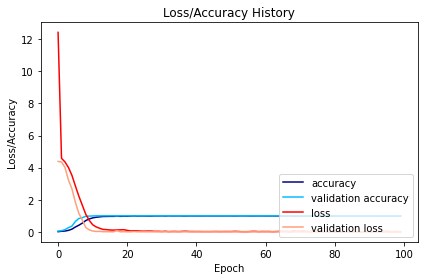

In [13]:
# plotting from history

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")


plots = plot1_loss + plot1_val_loss
labs = [plot.get_label() for plot in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History")
plt.tight_layout()
axis1.legend(loc='lower right')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Loss-Accuracy-Notes")
plt.show()

In [14]:
test_predictions = model.predict(X_test)

In [15]:
predicted_class_indices = np.argmax(test_predictions, axis=1)
predicted_classes = le.inverse_transform(predicted_class_indices)
print(predicted_classes)

['G#4' 'G#7' 'A3' 'E5' 'G6' 'A2' 'E7' 'F#4' 'A0' 'F2' 'C#7' 'B6' 'Bb1'
 'D4' 'B0' 'F7' 'Eb3' 'E6' 'Eb4' 'A0' 'C3' 'G2' 'B7' 'E4' 'Bb6' 'G#2' 'A1'
 'Eb5' 'F#4' 'D2' 'Eb5' 'F1' 'C5' 'E2' 'F6' 'G6' 'D7' 'Bb0' 'Eb6' 'C#5'
 'B7' 'A7' 'C4' 'Bb6' 'G#7' 'A4' 'F#5' 'Bb5' 'G2' 'A2' 'F7' 'G1' 'E1'
 'Eb7' 'Eb2' 'G#5' 'B2' 'A1' 'Bb6' 'C#4' 'B4' 'F#3' 'A5' 'Eb6' 'G4' 'Bb4'
 'F#7' 'E1' 'C6' 'Eb1' 'F#4' 'D5' 'A7' 'A0' 'D1' 'C6' 'E5' 'E1' 'C4' 'C5'
 'D5' 'C#7' 'G#1' 'F1' 'A1' 'G6' 'C#1' 'B1' 'Bb1' 'F#7' 'G#1' 'A4' 'Eb4'
 'C8' 'Eb2' 'C#2' 'B6' 'F#6' 'B7' 'G#5' 'A6' 'F#5' 'F4' 'G#6' 'G#3' 'Eb7'
 'G#2' 'A7' 'Bb3' 'Eb4' 'C8' 'F3' 'F3' 'E6' 'A2' 'D5' 'C7' 'G1' 'B0' 'G#1'
 'Bb7' 'Eb3' 'E5' 'C5' 'F6' 'A5' 'Eb7' 'C#3' 'B7' 'C#7' 'Eb2' 'D4' 'B3'
 'F5' 'Bb1' 'F1' 'E4' 'G3' 'G2' 'A5' 'G1' 'A4' 'G3' 'C1' 'C#7' 'A3' 'C2'
 'C#7' 'D6' 'G7' 'Bb4' 'C#6' 'B0' 'G1' 'E2' 'G#2' 'F1' 'D1' 'D1' 'Bb2'
 'F#5' 'Eb7' 'Eb4' 'F#3' 'C#3' 'Eb4' 'Eb1' 'D7' 'B1' 'Bb6' 'D6' 'D5' 'Eb3'
 'F7' 'Eb7' 'C3' 'C1' 'G#6' 'C4' 'F1' 'D2' 'Bb4' 'C

In [16]:
y_true = np.argmax(y_test, axis=1)
true_classes = le.inverse_transform(y_true)
print(true_classes)

['G#4' 'G#7' 'A3' 'E5' 'G6' 'A2' 'E7' 'F#4' 'A0' 'F2' 'C#7' 'B6' 'Bb1'
 'D4' 'B0' 'F7' 'Eb3' 'E6' 'Eb4' 'A0' 'C3' 'G2' 'B7' 'E4' 'Bb6' 'G#2' 'A1'
 'Eb5' 'F#4' 'D2' 'Eb5' 'F1' 'C5' 'E2' 'F6' 'G6' 'D7' 'Bb0' 'Eb6' 'C#5'
 'B7' 'A7' 'C4' 'Bb6' 'G#7' 'A4' 'F#5' 'Bb5' 'G2' 'A2' 'F7' 'G1' 'E1'
 'Eb7' 'Eb2' 'G#5' 'B2' 'A1' 'Bb6' 'C#4' 'B4' 'F#3' 'A5' 'Eb6' 'G4' 'Bb4'
 'F#7' 'E1' 'C6' 'Eb1' 'F#4' 'D5' 'A7' 'A0' 'D1' 'C6' 'E5' 'E1' 'C4' 'C5'
 'D5' 'C#7' 'G#1' 'F1' 'A1' 'G6' 'C#1' 'B1' 'Bb1' 'F#7' 'G#1' 'A4' 'Eb4'
 'C8' 'Eb2' 'C#2' 'B6' 'F#6' 'B7' 'G#5' 'A6' 'F#5' 'F4' 'G#6' 'G#3' 'Eb7'
 'G#2' 'A7' 'Bb3' 'Eb4' 'C8' 'F3' 'F3' 'E6' 'A2' 'D5' 'C7' 'G1' 'B0' 'G#1'
 'Bb7' 'Eb3' 'E5' 'C5' 'F6' 'A5' 'Eb7' 'C#3' 'B7' 'C#7' 'Eb2' 'D4' 'B3'
 'F5' 'Bb1' 'F1' 'E4' 'G3' 'G2' 'A5' 'G1' 'A4' 'G3' 'C1' 'C#7' 'A3' 'C2'
 'C#7' 'D6' 'G7' 'Bb4' 'C#6' 'B0' 'G1' 'E2' 'G#2' 'F1' 'D1' 'D1' 'Bb2'
 'F#5' 'Eb7' 'Eb4' 'F#3' 'C#3' 'Eb4' 'Eb1' 'D7' 'B1' 'Bb6' 'D6' 'D5' 'Eb3'
 'F7' 'Eb7' 'C3' 'C1' 'G#6' 'C4' 'F1' 'D2' 'Bb4' 'C

In [17]:
unique_labels = np.unique(np.concatenate([y_true, predicted_class_indices]))


# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_class_indices)
print("Accuracy:", accuracy)


# Generate a classification report
print(classification_report(y_true, predicted_class_indices, labels=unique_labels, target_names=le.inverse_transform(unique_labels)))


# Confusion matrix
cm = confusion_matrix(y_true, predicted_class_indices)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
              precision    recall  f1-score   support

          A0       1.00      1.00      1.00         3
          A1       1.00      1.00      1.00         3
          A2       1.00      1.00      1.00         3
          A3       1.00      1.00      1.00         2
          A4       1.00      1.00      1.00         3
          A5       1.00      1.00      1.00         3
          A6       1.00      1.00      1.00         1
          A7       1.00      1.00      1.00         3
          B0       1.00      1.00      1.00         3
          B1       1.00      1.00      1.00         2
          B2       1.00      1.00      1.00         1
          B3       1.00      1.00      1.00         1
          B4       1.00      1.00      1.00         1
          B6       1.00      1.00      1.00         2
          B7       1.00      1.00      1.00         4
         Bb0       1.00      1.00      1.00         1
         Bb1       1.00      1.00      1.00         3
         Bb2 

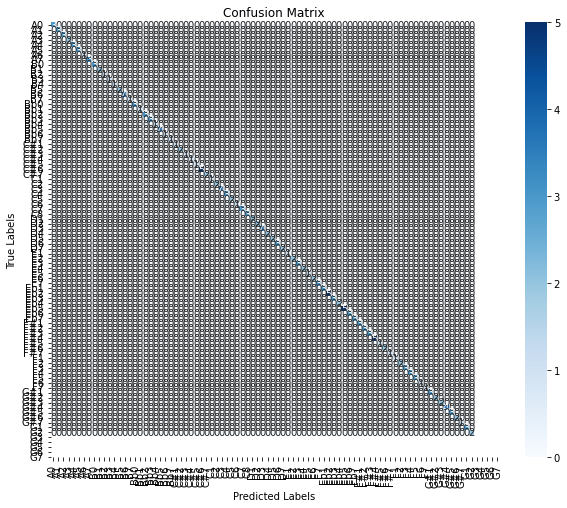

In [18]:


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Confusion-Matrix-Notes")
plt.show()
